# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | suva
Processing Record 4 of Set 1 | botou
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | altai
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | ha tinh
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | khandyga
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | kapa'a
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | blagoevgrad
Processing Record 22 of Set 1 | sittwe
Processing Record 23 of Set 1 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,46.49,55,0,9.22,US,1732486790
1,hamilton,39.1834,-84.5333,54.77,64,0,9.22,US,1732486837
2,suva,-18.1416,178.4415,81.88,83,100,4.61,FJ,1732486838
3,botou,38.0667,116.5667,44.22,90,100,5.39,CN,1732486839
4,punta arenas,-53.1500,-70.9167,48.31,53,75,9.22,CL,1732486741


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s') #convert utc 
city_data_df["Date"] = city_data_df["Date"].dt.strftime('%Y/%m/%d') #format the date

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,46.49,55,0,9.22,US,2024/11/24
1,hamilton,39.1834,-84.5333,54.77,64,0,9.22,US,2024/11/24
2,suva,-18.1416,178.4415,81.88,83,100,4.61,FJ,2024/11/24
3,botou,38.0667,116.5667,44.22,90,100,5.39,CN,2024/11/24
4,punta arenas,-53.1500,-70.9167,48.31,53,75,9.22,CL,2024/11/24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

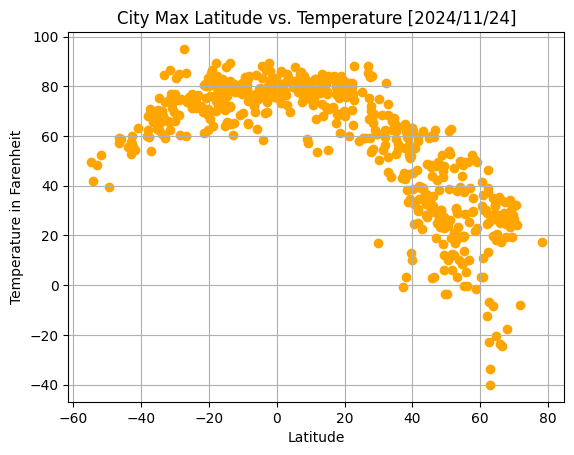

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color ='orange')

date = city_data_df["Date"].iloc[9]

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Max Latitude vs. Temperature [{date}]") 
plt.ylabel("Temperature in Farenheit")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

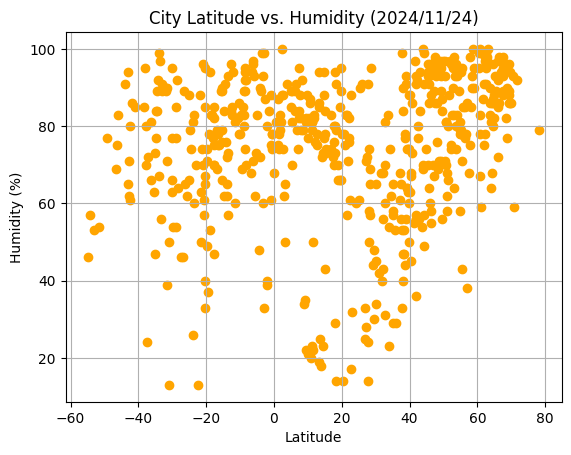

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color ='orange')
date = city_data_df["Date"].iloc[9]

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Humidity ({date})") 
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

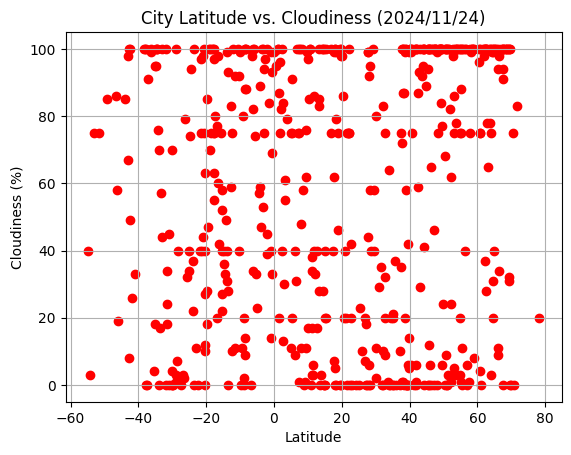

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color ='r')
date = city_data_df["Date"].iloc[9]

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness ({date})") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

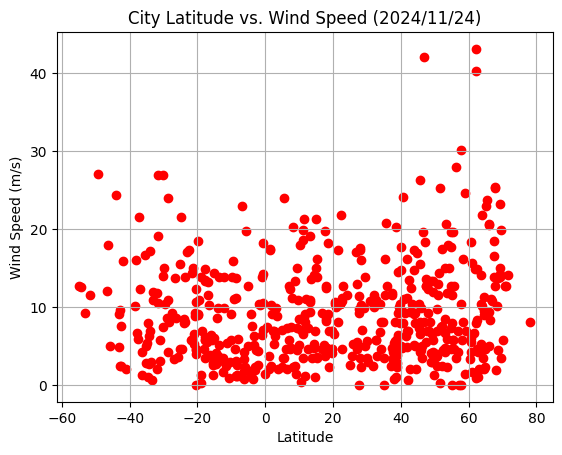

<Figure size 640x480 with 0 Axes>

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color ='r')
date = city_data_df["Date"].iloc[9]

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed ({date})") 
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def linear_regression_plots(city_data_df, x_column, y_column, box_position=None):
    x = city_data_df[x_column].values.reshape(-1, 1)
    y = city_data_df[y_column].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x.flatten(), y)
    regress_values = slope * x.flatten() + intercept

    # Line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = r_value**2

    # Calculate data bounds
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)

    # Plot scatter and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color="orange", label=f"{x_column} vs {y_column}")
    plt.plot(x, regress_values, color="blue", label=f"Regression Line {line_eq} (R²: {r_squared:.2f})")

    # Placement of the text box based on values in the scatter plot
    if box_position == "top-left":
        text_x = x_min + (x_max - x_min) * 0.1
        text_y = y_max - (y_max - y_min) * 0.1
    elif box_position == "top-right":
        text_x = x_max - (x_max - x_min) * 0.3
        text_y = y_max - (y_max - y_min) * 0.1
    elif box_position == "bottom-left":
        text_x = x_min + (x_max - x_min) * 0.1
        text_y = y_min + (y_max - y_min) * 0.1
    elif box_position == "bottom-right":
        text_x = x_max - (x_max - x_min) * 0.3
        text_y = y_min + (y_max - y_min) * 0.1
    else:
        text_x = x_min + (x_max - x_min) * 0.1
        text_y = y_min + (y_max - y_min) * 0.1 

    # Add the line equation as text
    plt.text(
        text_x, text_y, 
        f"{line_eq}", 
        fontsize=12, 
        bbox=dict(facecolor="wheat", alpha=0.5)
    )
    
    # Add title, labels, and grid
    plt.title(f"{y_column} vs {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)

    #Print R2 Value
    print(f"The r^2 value is {r_squared:.2f}")

    # Show plot
    plt.show()
   

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northHemDF = city_data_df[city_data_df["Lat"] > 0].reset_index(drop=True)

# Display sample data
northHemDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,46.49,55,0,9.22,US,2024/11/24
1,hamilton,39.1834,-84.5333,54.77,64,0,9.22,US,2024/11/24
2,botou,38.0667,116.5667,44.22,90,100,5.39,CN,2024/11/24
3,altai,46.3722,96.2583,3.22,55,65,4.99,MN,2024/11/24
4,ha tinh,18.3333,105.9000,68.67,91,79,4.76,VN,2024/11/24


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southHemDF = city_data_df[city_data_df["Lat"] < 0].reset_index(drop=True)


# Display sample data
southHemDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,suva,-18.1416,178.4415,81.88,83,100,4.61,FJ,2024/11/24
1,punta arenas,-53.1500,-70.9167,48.31,53,75,9.22,CL,2024/11/24
2,waitangi,-43.9535,-176.5597,55.71,91,85,24.34,NZ,2024/11/24
3,port mathurin,-19.6833,63.4167,76.23,74,28,18.48,MU,2024/11/24
4,puerto natales,-51.7236,-72.4875,52.25,54,75,11.50,CL,2024/11/24


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is 0.68


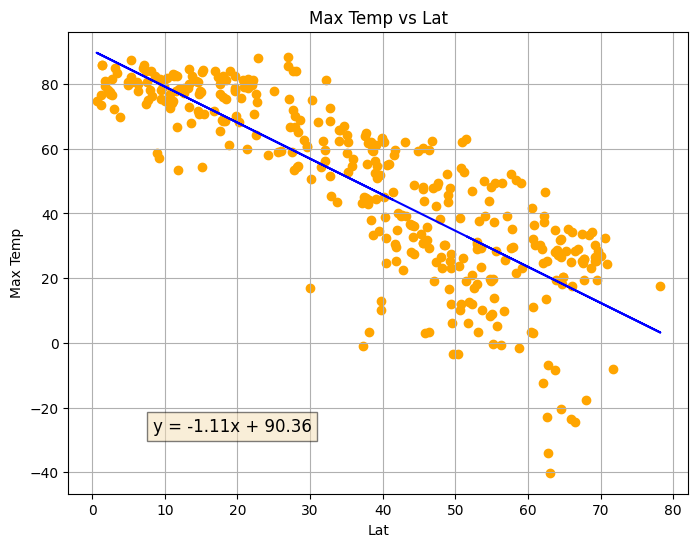

In [54]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northHemDF, "Lat", "Max Temp", box_position="bottom-left")



The r^2 value is 0.41


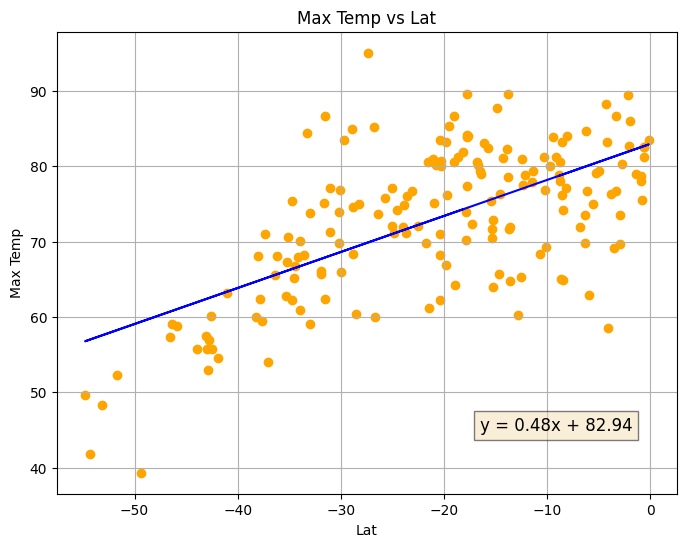

In [55]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southHemDF, "Lat", "Max Temp", box_position="bottom-right")

**Discussion about the linear relationship:** In the northern hemisphere, there appears to be moderately high correlation given the r^2 value between latitude and max temperature.  In the southern hemisphere, there is a lower correlation, but the regression line shows there is a positive correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is 0.09


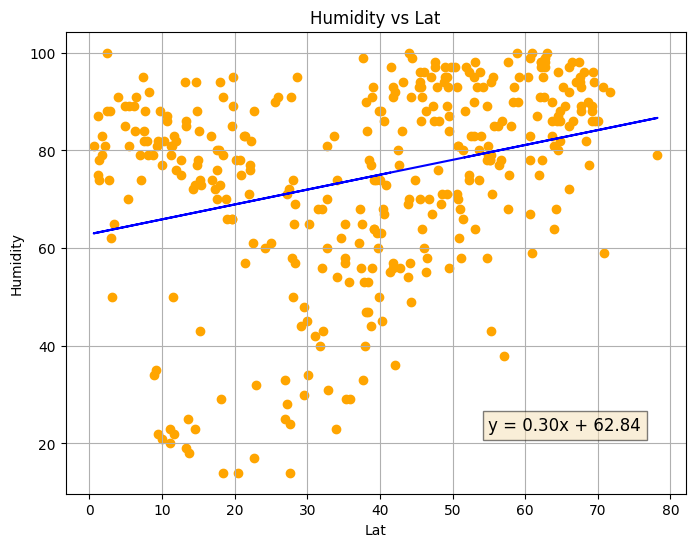

In [56]:
# Northern Hemisphere
linear_regression_plots(northHemDF, "Lat", "Humidity", box_position="bottom-right")

The r^2 value is 0.02


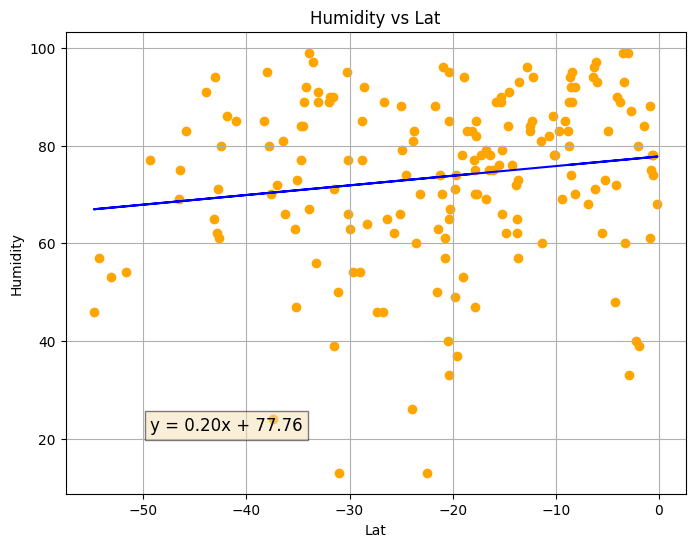

In [57]:
# Southern Hemisphere
linear_regression_plots(southHemDF, "Lat", "Humidity", box_position="bottom-left")

**Discussion about the linear relationship:** Humidity has a minor positive relationship with latitude. Humidity has more to do with atmospheric moisture and weather system characteristics which is why the scatter plot is all over the place. A low r^2 value also corroborates this in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is 0.03


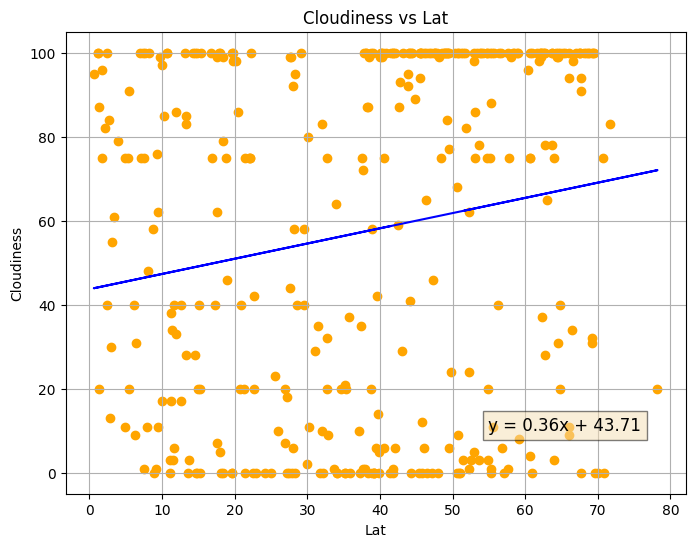

In [58]:
# Northern Hemisphere
linear_regression_plots(northHemDF, "Lat", "Cloudiness", box_position="bottom-right")

The r^2 value is 0.01


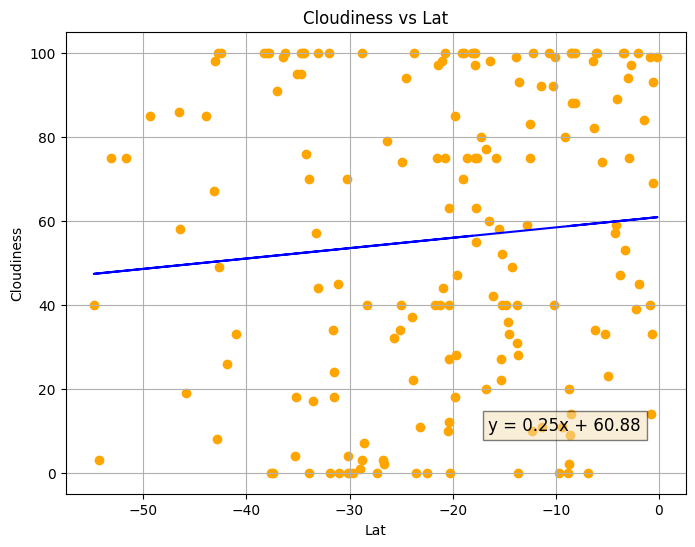

In [59]:
# Southern Hemisphere
linear_regression_plots(southHemDF, "Lat", "Cloudiness", box_position="bottom-right")

**Discussion about the linear relationship:** Cloudiness increases as you approach the equator.  Again, this is very weather system dependent.  

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is 0.02


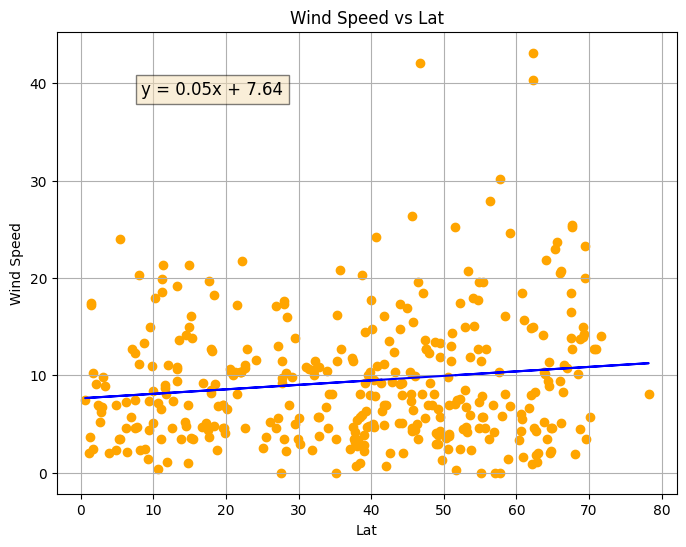

In [60]:
# Northern Hemisphere
linear_regression_plots(northHemDF, "Lat", "Wind Speed", box_position="top-left")

The r^2 value is 0.06


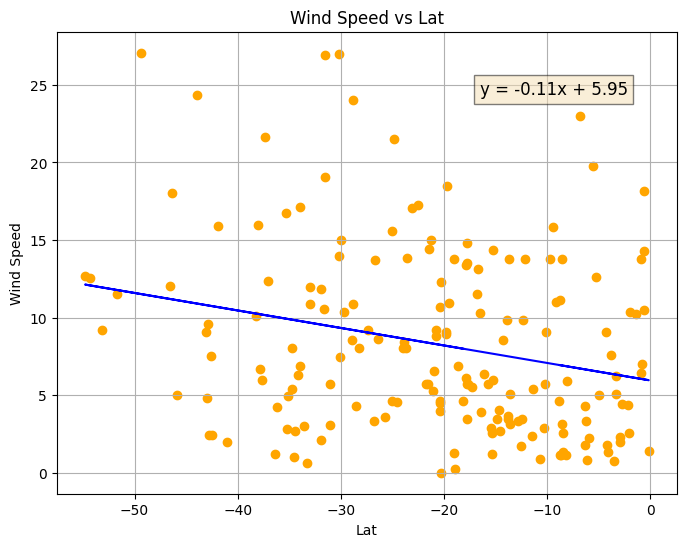

In [61]:
# Southern Hemisphere
linear_regression_plots(southHemDF, "Lat", "Wind Speed", box_position="top-right")

**Discussion about the linear relationship:** Wind speed has a slightly inverse relationship to latitude.  Wind Speed decreases as you approach the equator.  The r^2 value being very low also provides support for this.